In [1]:
# ============================================
# HANDWRITTEN DIGIT RECOGNIZER (CNN - ROTATION ROBUST)
# ============================================

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import cv2

# -----------------------------
# 1. LOAD DATA
# -----------------------------
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# -----------------------------
# 2. PREPROCESS
# -----------------------------
x_train = x_train.astype("float32")
x_test  = x_test.astype("float32")
x_train /= 255.0
x_test  /= 255.0






# Add channel dimension
x_train = x_train.reshape(-1, 28, 28, 1)
x_test  = x_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)

# -----------------------------
# 3. DATA AUGMENTATION
# -----------------------------
datagen = ImageDataGenerator(
    rotation_range=90,       # rotate images randomly ±30 degrees
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

datagen.fit(x_train)

# -----------------------------
# 4. MODEL
# -----------------------------
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# -----------------------------
# 5. TRAIN
# -----------------------------
# -----------------------------
# 5. TRAIN (Fixed)
# -----------------------------

# Split training data manually (e.g., 90% train, 10% validation)
val_split = 0.1
num_val = int(len(x_train) * val_split)

x_val = x_train[:num_val]
y_val = y_train[:num_val]
x_train_new = x_train[num_val:]
y_train_new = y_train[num_val:]

# Train generator with rotation augmentation
train_generator = datagen.flow(x_train_new, y_train_new, batch_size=128)

# Fit model with separate validation data
history = model.fit(
    train_generator,
    steps_per_epoch=len(x_train_new)//128,
    epochs=15,
    validation_data=(x_val, y_val)
)

# -----------------------------
# 6. EVALUATE
# -----------------------------
loss, acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {acc*100:.2f}%")




11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


421/421 ━━━━━━━━━━━━━━━━━━━━ 25s 49ms/step - accuracy: 0.4561 - loss: 1.5515 - val_accuracy: 0.9352 - val_loss: 0.2284
Epoch 2/15
  1/421 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7109 - loss: 0.8186

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


421/421 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7109 - loss: 0.8186 - val_accuracy: 0.9338 - val_loss: 0.2350
Epoch 3/15
421/421 ━━━━━━━━━━━━━━━━━━━━ 18s 43ms/step - accuracy: 0.7945 - loss: 0.6500 - val_accuracy: 0.9477 - val_loss: 0.1718
Epoch 4/15
421/421 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - accuracy: 0.8203 - loss: 0.6569 - val_accuracy: 0.9492 - val_loss: 0.1661
Epoch 5/15
421/421 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - accuracy: 0.8501 - loss: 0.4859 - val_accuracy: 0.9558 - val_loss: 0.1467
Epoch 6/15
421/421 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9062 - loss: 0.3109 - val_accuracy: 0.9557 - val_loss: 0.1490
Epoch 7/15
421/421 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - accuracy: 0.8811 - loss: 0.3950 - val_accuracy: 0.9647 - val_loss: 0.1122
Epoch 8/15
421/421 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - accuracy: 0.9297 - loss: 0.3345 - val_accuracy: 0.9655 - val_loss: 0.1089
Epoch 9/15
421/421 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - accuracy: 0.8952 - loss: 0.3480 - val_accuracy: 0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


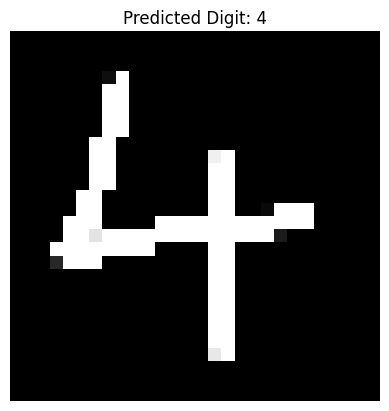

np.int64(4)

In [7]:
# -----------------------------
# 7. PREDICT EXTERNAL IMAGE (ROTATED)
# -----------------------------
def predict_digit(img_path):
    # Load image in grayscale
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    # Resize to 28x28
    img = cv2.resize(img, (28, 28))

    # Invert colors if needed
    img = cv2.bitwise_not(img)

    # Normalize
    img = img.astype("float32") / 255.0

    # Reshape for model
    img = img.reshape(1,28,28,1)

    # Predict
    pred = model.predict(img)
    digit = np.argmax(pred)

    # Show image
    plt.imshow(img.reshape(28,28), cmap="gray")
    plt.title(f"Predicted Digit: {digit}")
    plt.axis("off")
    plt.show()

    return digit

# Example usage:
predict_digit("/content/Screenshot 2025-12-14 202445.png")

In [8]:
# Export the model in TensorFlow SavedModel format
model.export("/content/handwritten_digit_cnn_savedmodel")
print("Model exported successfully in SavedModel format!")



Saved artifact at '/content/handwritten_digit_cnn_savedmodel'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  135569862541968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135569862542736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135569862544272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135569862542352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135569862543696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135569862546000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135569862545808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135569862543888: TensorSpec(shape=(), dtype=tf.resource, name=None)
Model exported successfully in SavedModel format!


In [29]:
model.save("/content/handwritten_digit_cnn_savedmodel_keras")


ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=/content/handwritten_digit_cnn_savedmodel_keras.

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Confusion Matrix:
 [[ 966    0    3    2    1    0    2    1    4    1]
 [   0 1118    1    4    3    0    0    6    3    0]
 [   1    0 1001    3    5    0    0   16    6    0]
 [   0    0    1 1002    0    2    0    3    2    0]
 [   0    0    6    0  943    4    1    4    6   18]
 [   0    0    1    8    0  863   12    0    2    6]
 [   1    3    0    0    1    6  945    0    2    0]
 [   0    1   46    3    7    0    0  965    0    6]
 [   3    1    9    2    4    1    0    0  950    4]
 [   0    0    1    1    4    4    0    7    8  984]]


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.94      0.97      0.95      1032
           3       0.98      0.99      0.98      1010
           4       0.97      0.96      0.97       982
           5       0.98      0.97      0.97       892
    

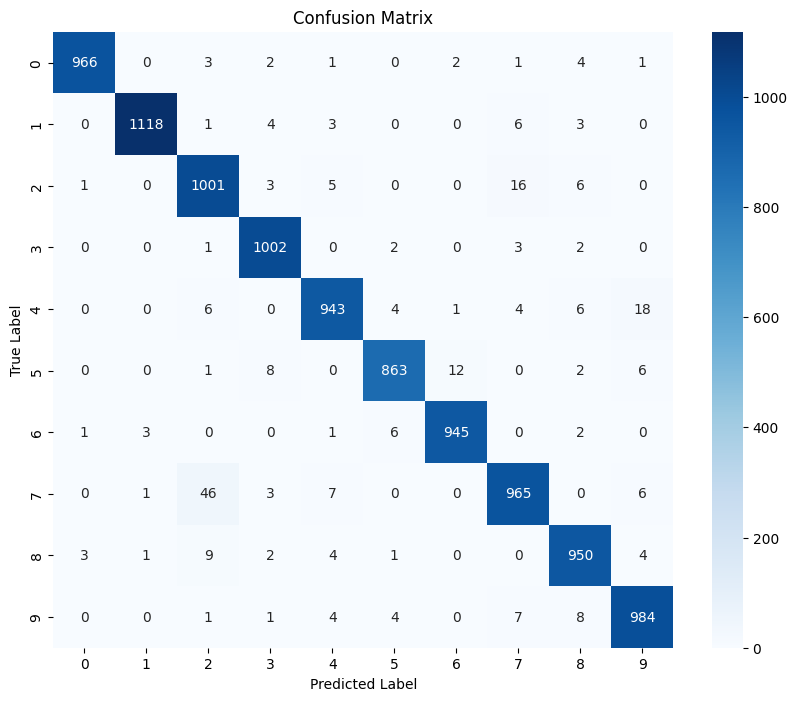

In [14]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
# Predict on the test set
y_pred = model.predict(x_test)
# Convert one-hot encoded y_test to integer labels
y_true = np.argmax(y_test, axis=1)

# Convert model predictions to integer labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_labels)
print("Confusion Matrix:\n", cm)

# Classification report (precision, recall, f1-score per class)
print("\n\nClassification Report:\n", classification_report(y_true, y_pred_labels))




# Overall accuracy
acc = accuracy_score(y_true, y_pred_labels)
print(f"Accuracy: {acc:.4f}")

# Macro-averaged precision, recall, f1-score
precision = precision_score(y_true, y_pred_labels, average='macro')
recall = recall_score(y_true, y_pred_labels, average='macro')
f1 = f1_score(y_true, y_pred_labels, average='macro')
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [22]:
!zip -r model.zip handwritten_digit_cnn_savedmodel


	zip warning: name not matched: handwritten_digit_cnn_savedmodel

zip error: Nothing to do! (try: zip -r model.zip . -i handwritten_digit_cnn_savedmodel)


In [16]:
# ============================================
# HANDWRITTEN DIGIT RECOGNIZER
# CNN - ROBUST FOR REAL-WORLD INPUT
# ============================================

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Flatten,
    Dense, Dropout, BatchNormalization
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 1. LOAD DATA
# -----------------------------
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# -----------------------------
# 2. PREPROCESS
# -----------------------------
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# Add channel dimension
x_train = x_train.reshape(-1, 28, 28, 1)
x_test  = x_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)

# -----------------------------
# 3. DATA AUGMENTATION
# -----------------------------
datagen = ImageDataGenerator(
    rotation_range=30,        # realistic rotation
    width_shift_range=0.2,    # translation robustness
    height_shift_range=0.2,
    zoom_range=0.2,
    shear_range=10,
    fill_mode="nearest"
)

datagen.fit(x_train)

# -----------------------------
# 4. MODEL ARCHITECTURE
# -----------------------------
model = Sequential([
    Conv2D(32, (3,3), padding="same", activation="relu", input_shape=(28,28,1)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.4),
    Dense(10, activation="softmax")
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

# -----------------------------
# 5. TRAIN / VALIDATION SPLIT
# -----------------------------
val_split = 0.1
num_val = int(len(x_train) * val_split)

x_val = x_train[:num_val]
y_val = y_train[:num_val]

x_train_new = x_train[num_val:]
y_train_new = y_train[num_val:]

train_generator = datagen.flow(
    x_train_new,
    y_train_new,
    batch_size=128
)

# -----------------------------
# 6. CALLBACKS
# -----------------------------
callbacks = [
    ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.5,
        patience=3,
        min_lr=1e-5,
        verbose=1
    ),
    EarlyStopping(
        monitor="val_loss",
        patience=6,
        restore_best_weights=True,
        verbose=1
    )
]

# -----------------------------
# 7. TRAIN MODEL
# -----------------------------
history = model.fit(
    train_generator,
    steps_per_epoch=len(x_train_new)//128,
    epochs=30,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)

# -----------------------------
# 8. EVALUATE
# -----------------------------
loss, acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {acc*100:.2f}%")

# -----------------------------
# 9. SAVE MODEL (RECOMMENDED)
# -----------------------------



/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,442 (947.04 KB)

 Trainable params: 241,994 (945.29 KB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


421/421 ━━━━━━━━━━━━━━━━━━━━ 128s 296ms/step - accuracy: 0.6191 - loss: 1.1584 - val_accuracy: 0.2672 - val_loss: 5.0151 - learning_rate: 0.0010
Epoch 2/30
  1/421 ━━━━━━━━━━━━━━━━━━━━ 1:42 243ms/step - accuracy: 0.9219 - loss: 0.2464

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


421/421 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9219 - loss: 0.2464 - val_accuracy: 0.2928 - val_loss: 4.6687 - learning_rate: 0.0010
Epoch 3/30
 89/421 ━━━━━━━━━━━━━━━━━━━━ 1:34 283ms/step - accuracy: 0.9197 - loss: 0.2643

KeyboardInterrupt: 

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step
Confusion Matrix:
 [[ 974    0    1    1    0    3    0    0    1    0]
 [   0 1124    4    2    0    0    0    5    0    0]
 [   2    0 1024    1    0    0    0    5    0    0]
 [   0    0    0 1008    0    1    0    1    0    0]
 [   0    2    2    0  973    0    1    0    1    3]
 [   0    0    0    5    0  884    3    0    0    0]
 [   0    1    2    0    1    4  949    0    1    0]
 [   0    1    8    0    1    0    0 1018    0    0]
 [   1    1    2    2    1    4    0    2  959    2]
 [   0    0    0    1   10    5    0    6    2  985]]


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       980
           1       1.00      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
   

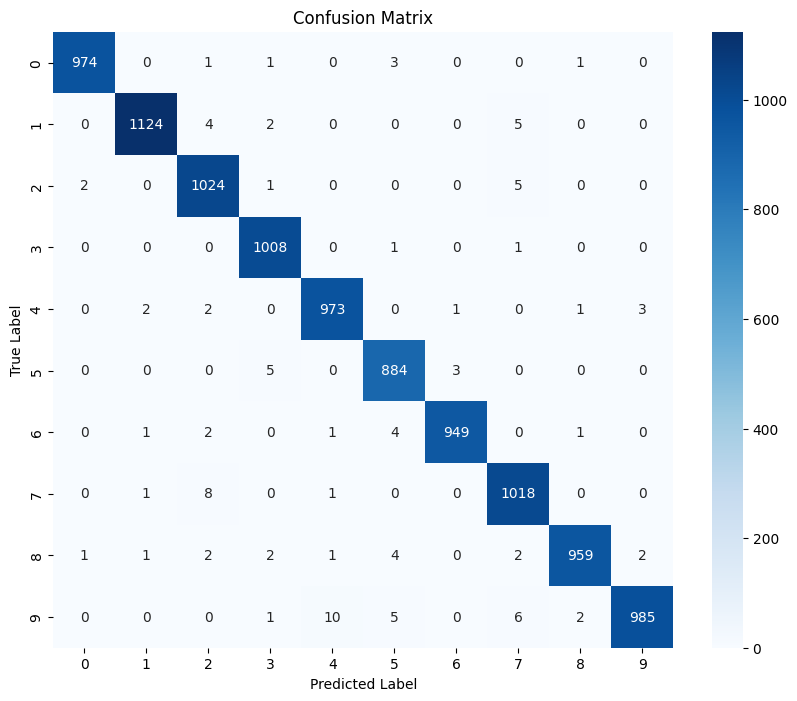

In [2]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
# Predict on the test set
y_pred = model.predict(x_test)
# Convert one-hot encoded y_test to integer labels
y_true = np.argmax(y_test, axis=1)

# Convert model predictions to integer labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_labels)
print("Confusion Matrix:\n", cm)

# Classification report (precision, recall, f1-score per class)
print("\n\nClassification Report:\n", classification_report(y_true, y_pred_labels))


# Overall accuracy
acc = accuracy_score(y_true, y_pred_labels)
print(f"Accuracy: {acc:.4f}")

# Macro-averaged precision, recall, f1-score
precision = precision_score(y_true, y_pred_labels, average='macro')
recall = recall_score(y_true, y_pred_labels, average='macro')
f1 = f1_score(y_true, y_pred_labels, average='macro')
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [3]:
# Export the model in TensorFlow SavedModel format
model.export("/content/handwritten_digit_cnn_savedmodel")
print("Model exported successfully in SavedModel format!")

Saved artifact at '/content/handwritten_digit_cnn_savedmodel'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  139561540060176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139561540061904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139561540063824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139561540061520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139561540061328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139561540062864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139561540064016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139561540064400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139561540065552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139561540065744: TensorSpec(shape=(), dtype=tf.resource, nam

In [18]:
!zip -r handwritten_digit_cnn_savedmodel.zip handwritten_digit_cnn_savedmodel

from google.colab import files
files.download('handwritten_digit_cnn_savedmodel.zip')


updating: handwritten_digit_cnn_savedmodel/ (stored 0%)
updating: handwritten_digit_cnn_savedmodel/saved_model.pb (deflated 87%)
updating: handwritten_digit_cnn_savedmodel/fingerprint.pb (stored 0%)
updating: handwritten_digit_cnn_savedmodel/variables/ (stored 0%)
updating: handwritten_digit_cnn_savedmodel/variables/variables.data-00000-of-00001 (deflated 8%)
updating: handwritten_digit_cnn_savedmodel/variables/variables.index (deflated 69%)
updating: handwritten_digit_cnn_savedmodel/assets/ (stored 0%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

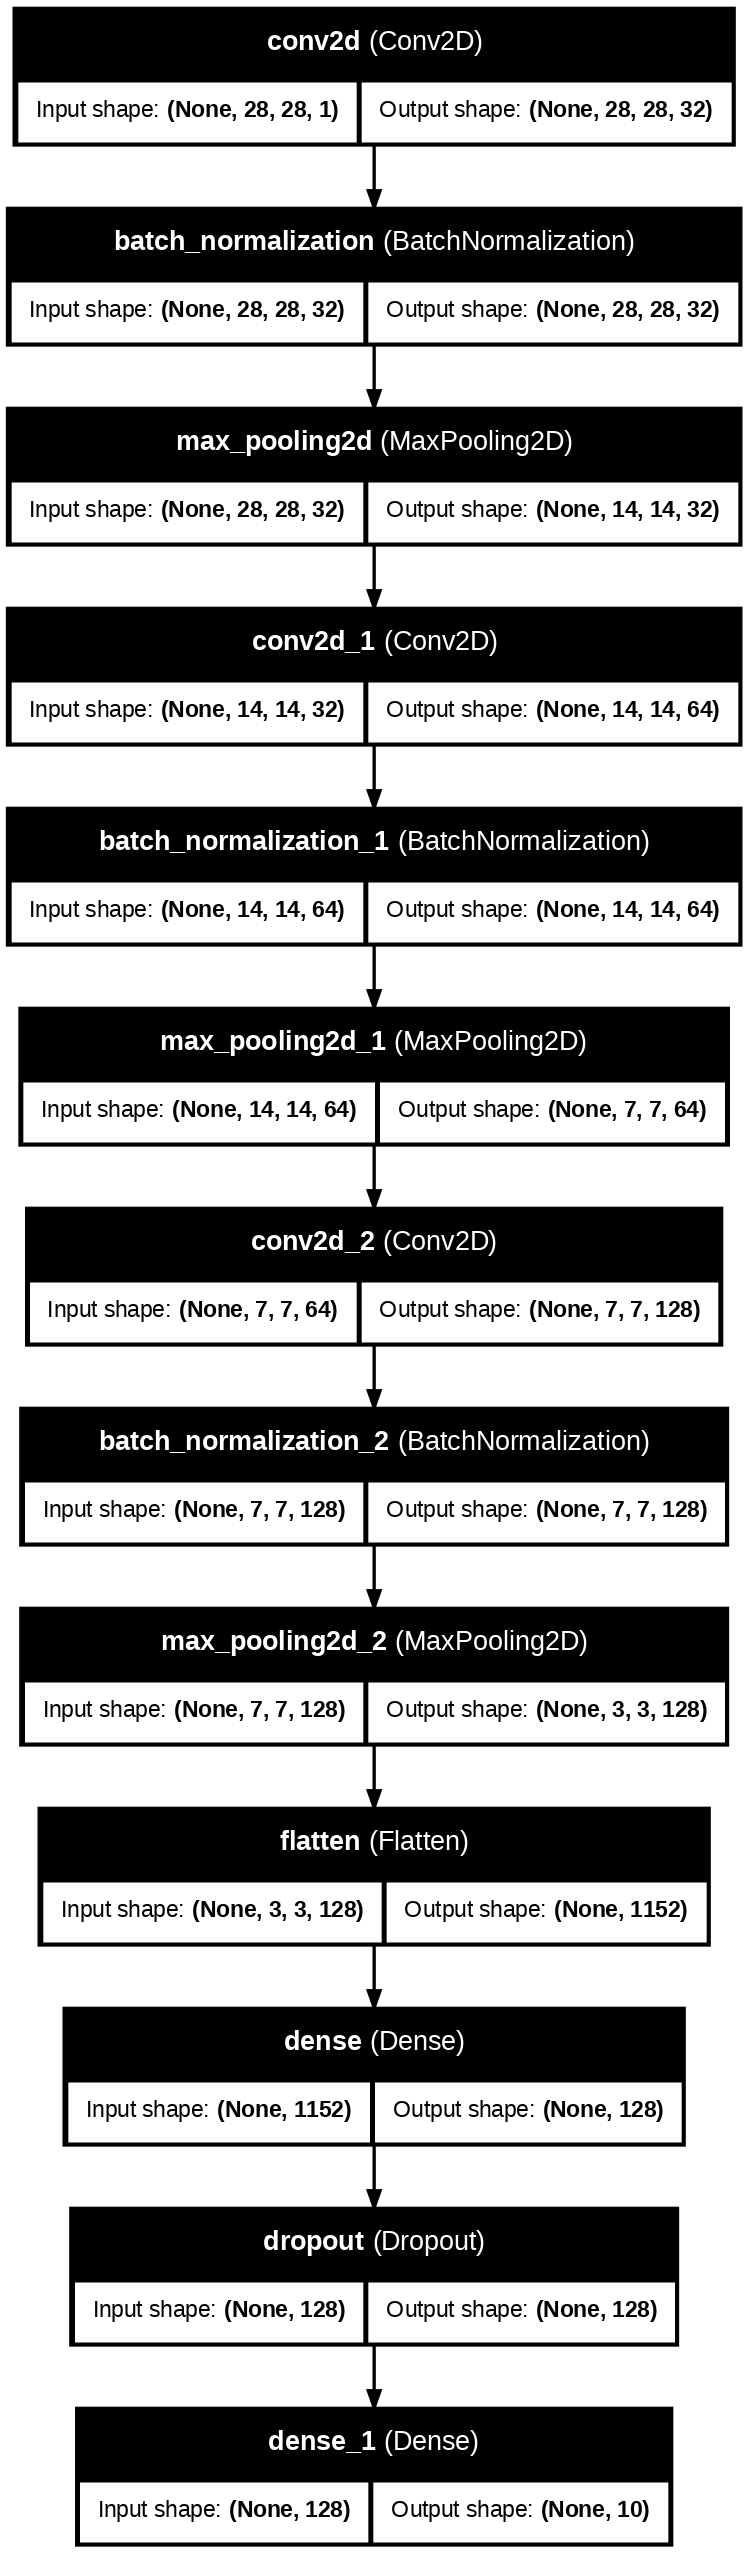

In [4]:
from tensorflow.keras.utils import plot_model

plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
    dpi=120
)


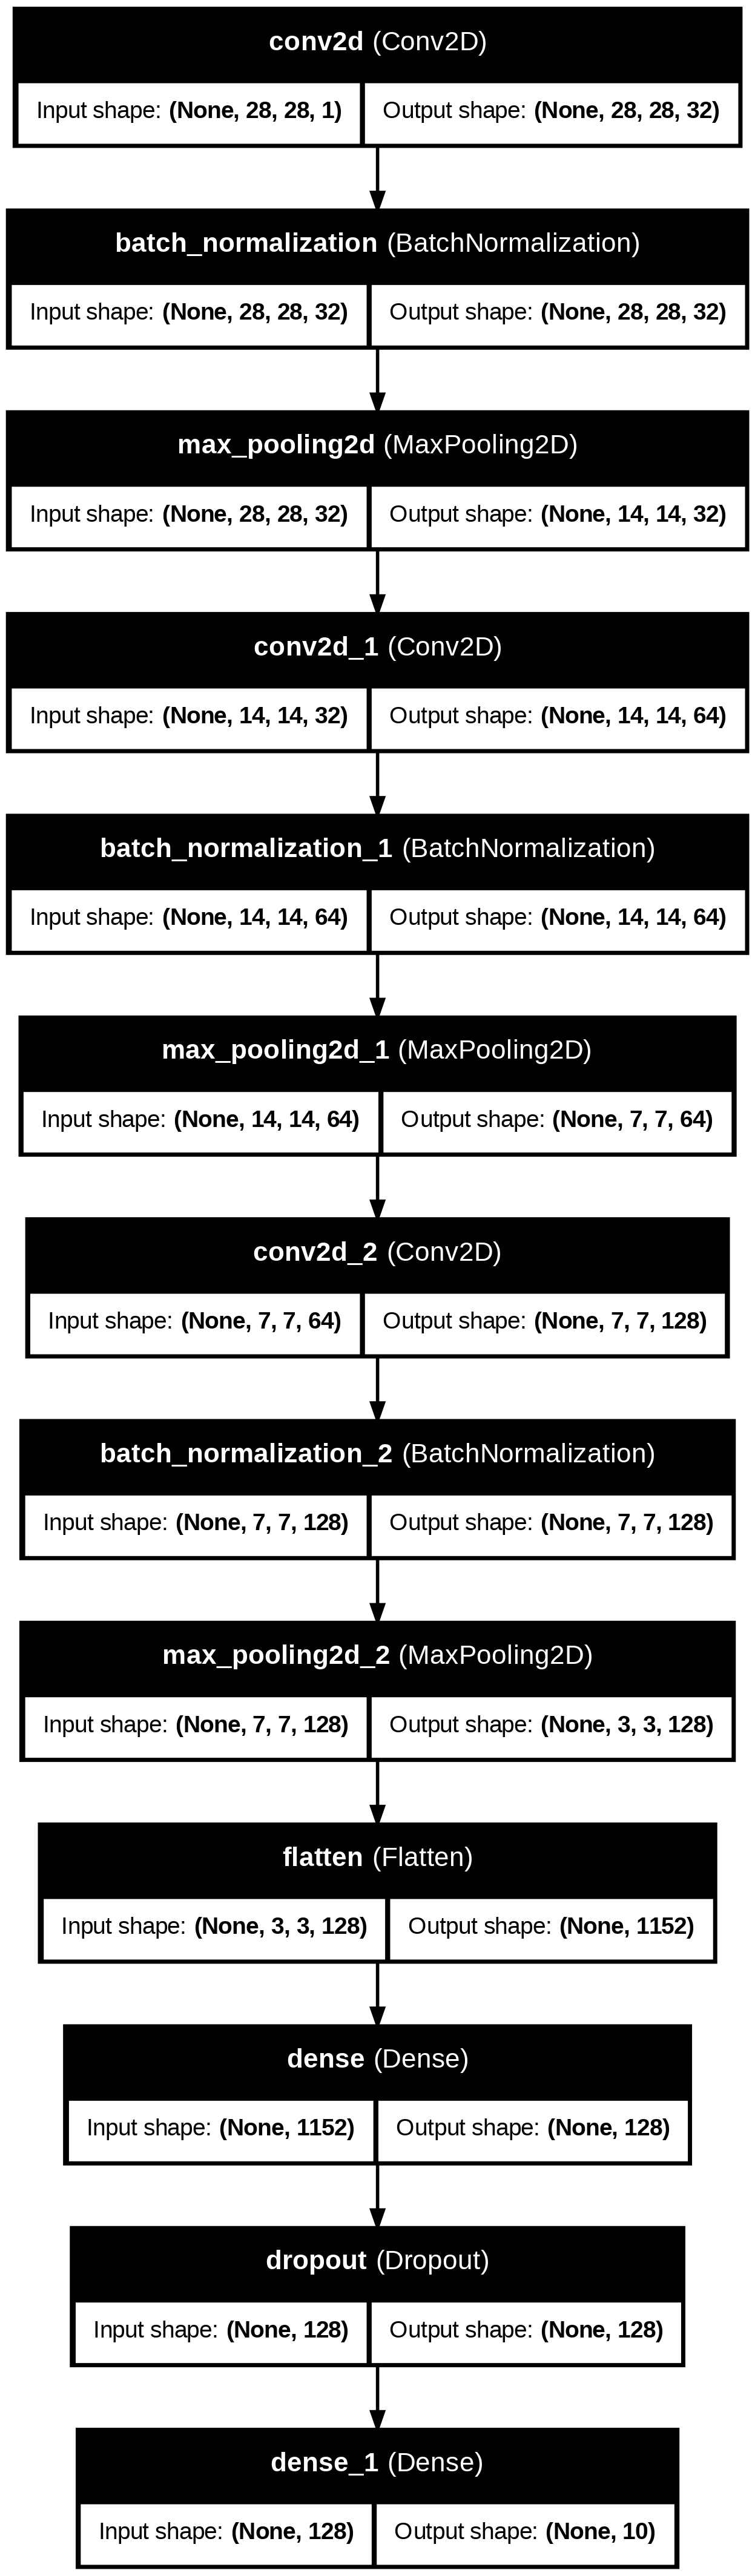

In [5]:
plot_model(
    model,
    to_file="cnn_architecture.png",
    show_shapes=True,
    show_layer_names=True
)

#files.download("cnn_architecture.svg")


In [6]:
from tensorflow.keras.utils import plot_model
from google.colab import files

plot_model(
    model,
    to_file="cnn_architecture.png",
    show_shapes=True,
    show_layer_names=True,
    dpi=200
)

files.download("cnn_architecture.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

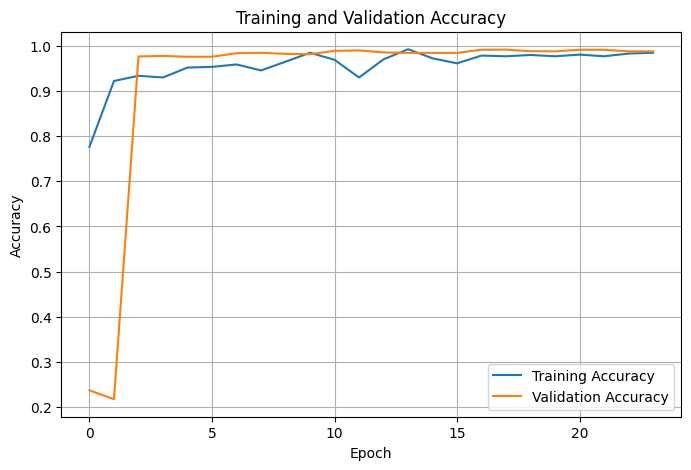

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


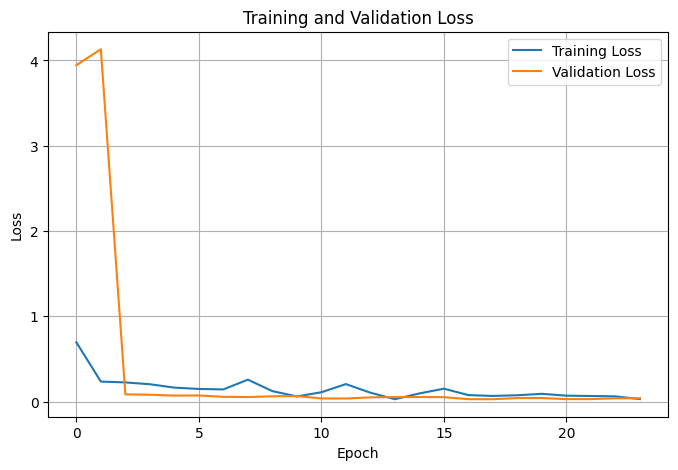

In [14]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [10]:
!pip install visualkeras

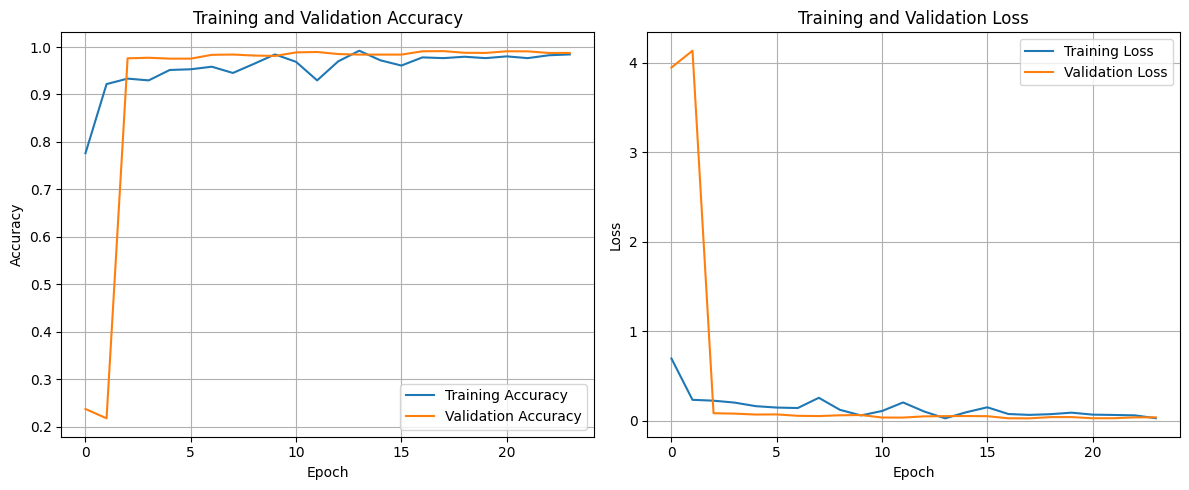

Training curves saved as training_curves_combined.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
# ============================================
# VISUALIZE CNN AND TRAINING CURVES
# ============================================

import visualkeras
import matplotlib.pyplot as plt
from google.colab import files


# -----------------------------
# 3. Training Curves (Combined Figure)
# -----------------------------
plt.figure(figsize=(12,5))

# Accuracy subplot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)

# Loss subplot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig("training_curves_combined.png", dpi=300, bbox_inches="tight")
plt.show()
print("Training curves saved as training_curves_combined.png")

# Download the training curves
files.download("training_curves_combined.png")


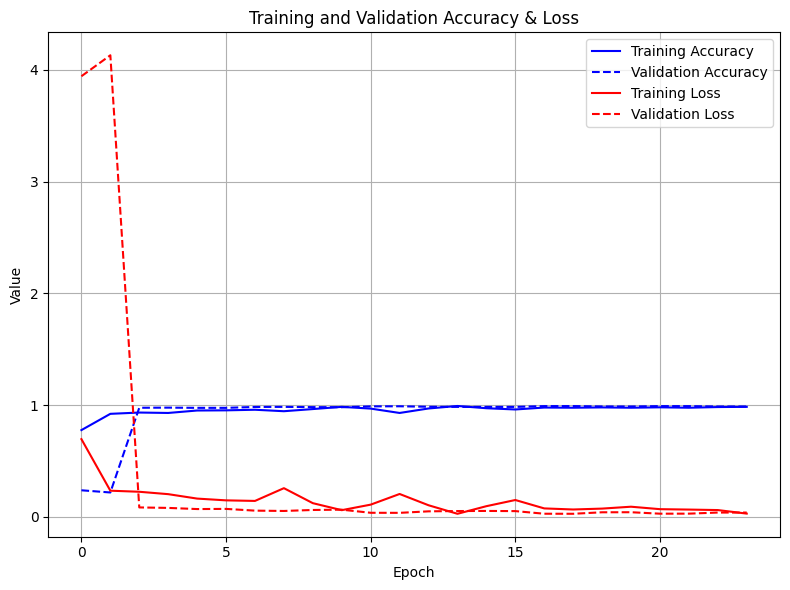

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
import matplotlib.pyplot as plt
from google.colab import files

plt.figure(figsize=(8,6))

# Plot all four curves in one graph
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue', linestyle='-')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='blue', linestyle='--')
plt.plot(history.history['loss'], label='Training Loss', color='red', linestyle='-')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red', linestyle='--')

plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Training and Validation Accuracy & Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("training_curves_all_in_one.png", dpi=300, bbox_inches="tight")
plt.show()

# Download the combined figure
files.download("training_curves_all_in_one.png")
